### Cosmic Star Formation Rate Density

This code uses the data file provided on the GitHub associated with the Briel paper:

`data.h5`

Considering only the TNG SFH, it attempts to recreate Figure 2 in the paper

##### Imports

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.integrate

##### Data

In [2]:
path = "/Users/dillon/Desktop"
data = h5py.File(f"{path}/data.h5", "r")

SFH = data["SFH"]

##### Plotting

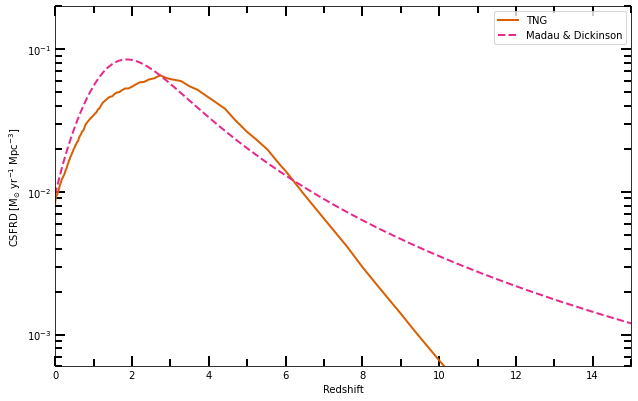

In [3]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

ax.plot(SFH['TNG'].attrs['redshift'], np.sum(SFH["TNG"], axis=0), label="TNG", lw=2, color="#d95f02")
ax.plot(SFH['empirical'].attrs["redshift"], np.sum(SFH['empirical'], axis=0), "--", label=r"Madau & Dickinson", lw=2, color="#e7298a")

ax.set_yscale('log')
ax.set_xlim(0,15)
ax.set_ylim(6e-4,2e-1)

ax.set_ylabel(r'CSFRD [$\mathrm{M}_{\odot}\ \mathrm{yr}^{-1}\ \mathrm{Mpc}^{-3}$]')
ax.set_xlabel("Redshift")
ax.legend()

Note that the 'Madau & Dickinson' line in the above plot is taken directly from the data 

In the paper (Section 3.1) they remark this line originates from the work of Madau & Dickinson (2014) [Equation 15]. The equation is transformed from a Salpeter to a Kroupa IMF by multiplying it by 0.66

Below is a comparison between the Madau & Dickinson equation (multiplied by 0.66) and the line that is used in Briel Figure 2  

In [4]:
z = np.linspace(0, 15, 1000)

M_D = 0.015 * (1 + z)**2.7 / (1 + ((1 + z) / 2.9)**5.6)

trans_M_D = 0.66 * M_D

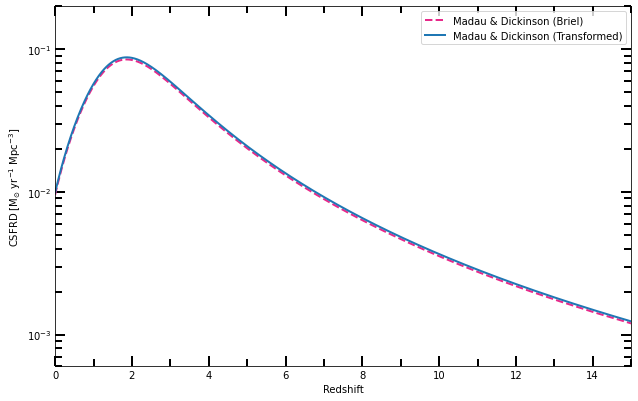

In [5]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

ax.plot(SFH['empirical'].attrs["redshift"], np.sum(SFH['empirical'], axis=0), "--", label=r"Madau & Dickinson (Briel)", lw=2,  color="#e7298a")
ax.plot(z, trans_M_D, lw = 2, label = 'Madau & Dickinson (Transformed)') 

ax.set_yscale('log')
ax.set_xlim(0,15)
ax.set_ylim(6e-4,2e-1)

ax.set_ylabel(r'CSFRD [$\mathrm{M}_{\odot}\ \mathrm{yr}^{-1}\ \mathrm{Mpc}^{-3}$]')
ax.set_xlabel("Redshift")
ax.legend()


##### Lookback Time

Defining a function to calculate the lookback time in order to recreate the RHS of Figure 2 in the Briel paper

Parameters:

    z - Redshift 

    omega1 - Matter density parameter (0.3111)

    omega2 - Dark energy density parameter (0.6889)

    hubble - Hubble parameter (0.6889)

In [6]:
@np.vectorize
def lookback(z, omega1, omega2, hubble):
    
    def f(x):
        a = np.sqrt(omega1*(1+x)**3 + omega2)
        return 1/((1+x)*a)
    t_hubble = (1/(100*hubble))*3.0856776*10**19
    return t_hubble *scipy.integrate.quad(f, 0, z)[0]/(60*60*24*365.2388526*1e9)

In [7]:
h = SFH.attrs['h']
omega_M = SFH.attrs['omega_M']
omega_L = SFH.attrs['omega_L']

##### Plotting

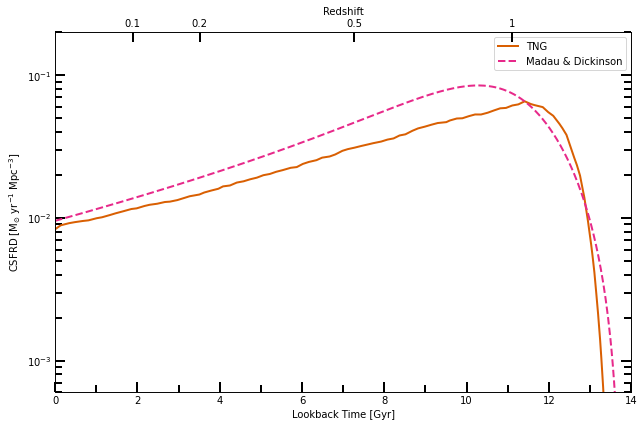

In [8]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

ax.plot(lookback(SFH['TNG'].attrs["redshift"], omega_M, omega_L, h), 
        np.sum(SFH["TNG"], axis=0),
        label="TNG",
        lw=2,
        color="#d95f02")

ax.plot(lookback(SFH['empirical'].attrs["redshift"], omega_M, omega_L, h),
        np.sum(SFH['empirical'], axis=0),
        "--",
        label=r"Madau & Dickinson",
        lw=2,
        color="#e7298a")

ax.set_yscale('log')
ax.set_xlim(0,14)
ax.set_ylim(6e-4,2e-1)

ax.set_ylabel(r'CSFRD [$\mathrm{M}_{\odot}\ \mathrm{yr}^{-1}\ \mathrm{Mpc}^{-3}$]')
ax.set_xlabel("Lookback Time [Gyr]")

#Adding Redshift Axis
ax2 = ax.twiny()
ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in')
ax2.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
ax2.set_xlim(0,10)
z_values = [0.1, 0.2, 0.5, 1, 2, 3, 5, 10]
ax2.xaxis.set_major_locator(mpl.ticker.FixedLocator(lookback(z_values, omega_M, omega_L, h)))
ax2.set_xticklabels(z_values)
ax2.set_xlabel('Redshift')

ax.legend()